<a href="https://colab.research.google.com/github/FelipeZarate14/Mineria_de_Datos/blob/main/ImplementacionModeloRegresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implementación de Modelo Regresion**

Objetivo: Predecir la calificación final o promedio.

Integrantes:
* Angel Enrique Carlo Aquino
* Diego Elías López Martínez
* Felipe de Jesus Pedro Zarate
* Jair Argel Salvador Arrieta
* José Luis Pimentel Reyes
* Yahir Adrían Ruiz Machuca

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Cargar el DataSet
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/StudentsPerformance.csv')

#Ver el Dataset
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Crear variable objetivo: calificación final (promedio)

df['promedio_final'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,promedio_final
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


**PREPARAR DATOS PARA EL MODELO FINAL**

In [ ]:
# Usamos todas las variables para predecir promedio final
X = df.drop(['promedio_final', 'math score', 'reading score', 'writing score'], axis=1)
y = df['promedio_final']


In [ ]:
#Variables predictoras después de eliminar las puntuaciones individuales
print(X.columns.tolist())

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [ ]:
# Convertir variables categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

print(f"Variables predictoras: {X_encoded.shape[1]}")
print(f"Tamaño del dataset: {X_encoded.shape[0]}")

Variables predictoras: 12
Tamaño del dataset: 1000


**DIVIDIR DATOS EN ENTRENAMIENTO Y PRUEBA**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [ ]:
print(f"Entrenamiento: {X_train.shape[0]} observaciones")
print(f"Prueba: {X_test.shape[0]} observaciones")
print(f"Variables: {X_train.shape[1]} características")

Entrenamiento: 800 observaciones
Prueba: 200 observaciones
Variables: 12 características


**ENTRENAR MODELO DE REGRESIÓN LINEAL**

In [ ]:
modelo_final = LinearRegression()
modelo_final.fit(X_train, y_train)


LinearRegression()

In [ ]:
print(f"Intercepto: {modelo_final.intercept_:.4f}")
print(f"Número de coeficientes: {len(modelo_final.coef_)}")

Intercepto: 68.2749
Número de coeficientes: 12


**HACER PREDICCIONES**

In [ ]:
y_pred = modelo_final.predict(X_test)

print("PREDICCIONES REALIZADAS")
print("Ejemplos de predicciones vs valores reales:")
comparacion = pd.DataFrame({
    'Real': y_test.values[:10],
    'Predicho': y_pred[:10],
    'Error': np.abs(y_test.values[:10] - y_pred[:10])
})
print(comparacion.round(2))

PREDICCIONES REALIZADAS
Ejemplos de predicciones vs valores reales:
    Real  Predicho  Error
0  87.00     70.52  16.48
1  64.00     67.28   3.28
2  75.00     72.80   2.20
3  74.67     56.37  18.30
4  81.67     78.50   3.17
5  78.00     60.09  17.91
6  67.33     64.04   3.29
7  59.00     74.07  15.07
8  77.33     57.22  20.11
9  48.67     69.98  21.31


In [ ]:
#Correlación de math score vs Todas las variables del DF

numericas = df.select_dtypes(include='number').columns

for c in numericas:
    corr, p_value = pearsonr(df['math score'], df[c])
    print('***' * 20)
    print(f"Variable: {c}")
    print(f"Correlación lineal: {corr} con valor de p: {p_value}")

************************************************************
Variable: math score
Correlación lineal: 1.0 con valor de p: 0.0
************************************************************
Variable: reading score
Correlación lineal: 0.8175796636720541 con valor de p: 1.7877531099061433e-241
************************************************************
Variable: writing score
Correlación lineal: 0.802642045949808 con valor de p: 3.3760270425673703e-226
************************************************************
Variable: promedio_final
Correlación lineal: 0.918745758838345 con valor de p: 0.0


**EVALUACIÓN DEL MODELO - MÉTRICAS REQUERIDAS**

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")

Error Absoluto Medio (MAE): 10.4902
Error Cuadrático Medio (MSE): 179.6023
Raíz del Error Cuadrático Medio (RMSE): 13.4016


In [ ]:
# Calcular R-squared manualmente para verificar
ss_res = np.sum((y_test - y_pred) ** 2)
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
r2 = 1 - (ss_res / ss_tot)
print(f"R-cuadrado (R²): {r2:.4f}")

R-cuadrado (R²): 0.1622


**VISUALIZACIÓN DE RESULTADOS**

Text(0.05, 0.95, 'MAE: 10.49\nRMSE: 13.40\nR²: 0.162')

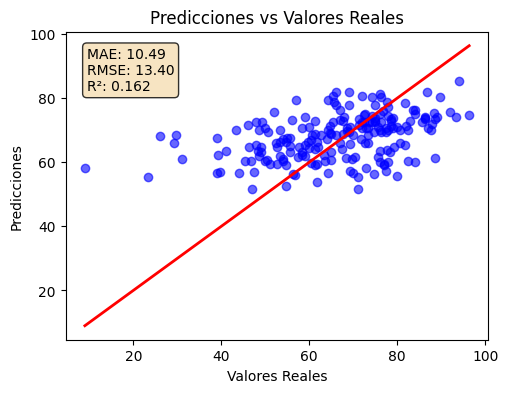

In [ ]:
# Gráfico 1: Predicciones vs Valores reales

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'red', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')


# Añadir métricas en el gráfico
textstr = f'MAE: {mae:.2f}\nRMSE: {rmse:.2f}\nR²: {r2:.3f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)


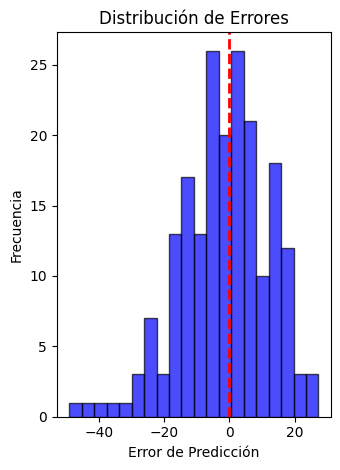

In [ ]:
# Gráfico 2: Distribución de errores
plt.subplot(1, 2, 2)
errores = y_test - y_pred
plt.hist(errores, bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Error de Predicción')
plt.ylabel('Frecuencia')
plt.title('Distribución de Errores')
plt.tight_layout()
plt.show()

**ANÁLISIS DE RESIDUOS**

In [ ]:
residuos = y_test - y_pred

print("ANÁLISIS DE RESIDUOS")
print(f"Media de residuos: {residuos.mean():.6f}")
print(f"Desviación estándar de residuos: {residuos.std():.4f}")
print(f"Rango de residuos: [{residuos.min():.2f}, {residuos.max():.2f}]")

ANÁLISIS DE RESIDUOS
Media de residuos: -1.700141
Desviación estándar de residuos: 13.3267
Rango de residuos: [-49.04, 27.26]


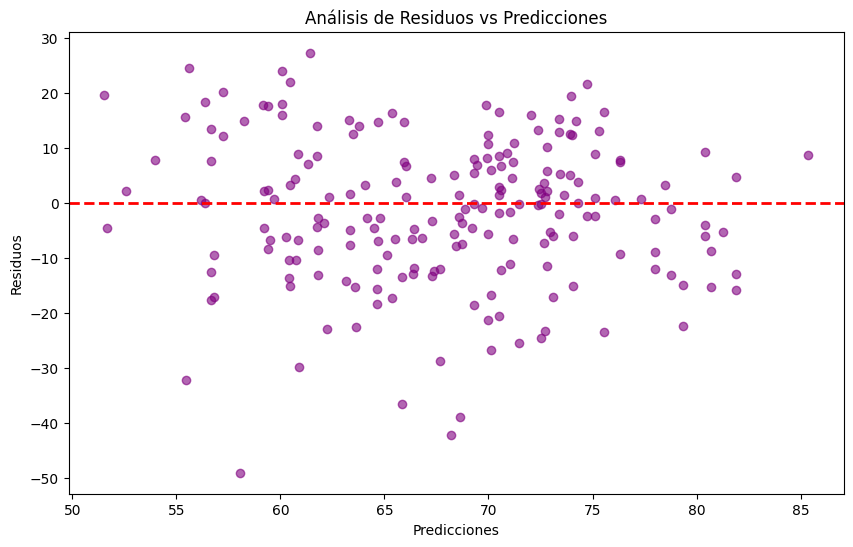

In [ ]:
# Gráfico de residuos vs predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.6, color='purple')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos vs Predicciones')
plt.show()

**VARIABLES MÁS IMPORTANTES**

In [ ]:
# Crear DataFrame con coeficientes
coeficientes = pd.DataFrame({
    'Variable': X_encoded.columns,
    'Coeficiente': modelo_final.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)

print(coeficientes.head(10))

                                         Variable  Coeficiente
10                                 lunch_standard     9.207655
11                   test preparation course_none    -7.877698
4                          race/ethnicity_group E     5.960212
6         parental level of education_high school    -4.656963
0                                     gender_male    -4.091855
3                          race/ethnicity_group D     3.780858
5   parental level of education_bachelor's degree     3.502102
9    parental level of education_some high school    -3.272996
7     parental level of education_master's degree     1.928394
2                          race/ethnicity_group C     0.917935


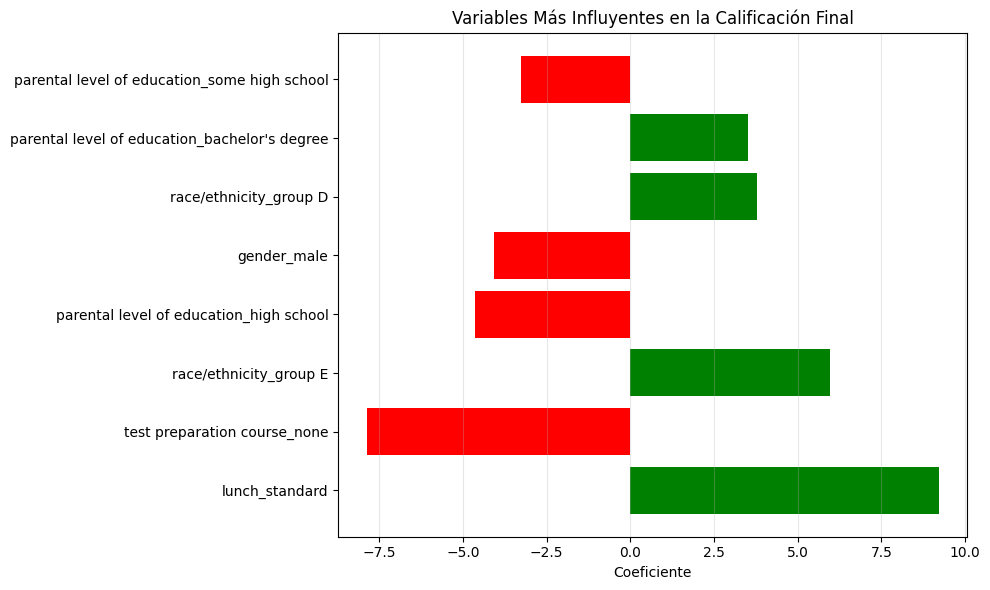

In [ ]:
# Gráfico de variables más importantes
plt.figure(figsize=(10, 6))
top_variables = coeficientes.head(8)
colors = ['green' if x > 0 else 'red' for x in top_variables['Coeficiente']]
plt.barh(top_variables['Variable'], top_variables['Coeficiente'], color=colors)
plt.xlabel('Coeficiente')
plt.title('Variables Más Influyentes en la Calificación Final')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

**INTERPRETACIÓN DEL MODELO**

In [ ]:
print(f"El modelo explica el {r2*100:.1f}% de la variabilidad en las calificaciones finales")
print(f"Error promedio de predicción: ±{mae:.2f} puntos")
print(f"Desviación estándar del error: ±{rmse:.2f} puntos")

print("\nVariables con mayor impacto positivo:")
for _, row in coeficientes[coeficientes['Coeficiente'] > 0].head(3).iterrows():
    print(f" * {row['Variable']}: +{row['Coeficiente']:.2f} puntos")

print("\nVariables con mayor impacto negativo:")
for _, row in coeficientes[coeficientes['Coeficiente'] < 0].head(3).iterrows():
    print(f" * {row['Variable']}: {row['Coeficiente']:.2f} puntos")

El modelo explica el 16.2% de la variabilidad en las calificaciones finales
Error promedio de predicción: ±10.49 puntos
Desviación estándar del error: ±13.40 puntos

Variables con mayor impacto positivo:
 * lunch_standard: +9.21 puntos
 * race/ethnicity_group E: +5.96 puntos
 * race/ethnicity_group D: +3.78 puntos

Variables con mayor impacto negativo:
 * test preparation course_none: -7.88 puntos
 * parental level of education_high school: -4.66 puntos
 * gender_male: -4.09 puntos


In [ ]:
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-latex-recommended texlive-latex-extra pandoc
!jupyter nbconvert --to pdf '/content/drive/MyDrive/Colab Notebooks/ImplementacionModeloRegresion.ipynb'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-latex-recommended is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/ImplementacionModeloRegresion.ipynb to pdf
[NbConvertApp] Support files will be in ImplementacionModeloRegresion_files/
[NbConvertApp] Making directory ./ImplementacionModeloRegresion_files
[NbConvertApp] Writing 57332 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WAR